In [14]:
! pip install geopandas
! pip install pulp
! pip install spopt
! pip install glpk
! pip install coinor-cbc
! pip install matplotlib-scalebar


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached glpk-0.4.7.tar.gz (161 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build glpk


  error: subprocess-exited-with-error
  
  × Building wheel for glpk (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [11 lines of output]
      WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
      Traceback (most recent call last):
        File "C:\Users\ASUS\AppData\Local\Temp\pip-build-env-q1z8b634\overlay\Lib\site-packages\setuptools_scm\_integration\pyproject_reading.py", line 36, in read_pyproject
          section = defn.get("tool", {})[tool_name]
                    ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
      KeyError: 'setuptools_scm'
      running bdist_wheel
      running build
      running build_ext
      building 'glpk' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a p


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
%config InlineBackend.figure_format = "retina"
%load_ext watermark
%watermark

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2024-07-11T22:43:20.390205+07:00

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.24.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [16]:
import pandas as pd
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.lines as mlines
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry import Point
import time
import numpy as np
import pulp
import shapely
import spopt
from spopt.locate import PCenter, simulated_geo_points
from ortools.linear_solver import pywraplp

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # ignore deprecation warning - GH pysal/spaghetti#649
    import spaghetti

%watermark -w
%watermark -iv

Watermark: 2.4.3

shapely            : 2.0.4
numpy              : 1.26.4
networkx           : 3.3
pulp               : 2.8.0
matplotlib_scalebar: 0.8.1
ortools            : 9.10.4067
spaghetti          : 1.7.5.post1
spopt              : 0.6.0
geopandas          : 0.14.4
matplotlib         : 3.9.0
pandas             : 2.2.2



In [17]:
network_distance = pd.read_csv('C:/Users/ASUS/Downloads/project/python-rescue-station/data/csv/network_distance.csv')
network_distance

,StartPoint,EndPoint,Distance,net_length
0,49,50,10.0,510.0
1,50,51,10.0,0.0
2,51,52,10.0,0.0
3,52,53,10.0,0.0
4,53,54,10.0,0.0
...,...,...,...,...
2597,99,95,40.0,0.0
2598,99,96,30.0,0.0
2599,99,97,20.0,0.0
2600,99,98,10.0,0.0


In [18]:
facility_points = pd.read_csv('C:/Users/ASUS/Downloads/project/python-rescue-station/data/csv/facility_points.csv')
facility_points = facility_points.reset_index(drop=True)
facility_points

,Id,FacilityPoints,XX,YY
0,49,49,612711.842339,1.189633e+06
1,50,50,612721.419317,1.189635e+06
2,51,51,612730.996295,1.189638e+06
3,52,52,612740.573272,1.189641e+06
4,53,53,612750.150250,1.189644e+06
5,54,54,612759.727228,1.189647e+06
6,55,55,612769.304206,1.189650e+06
7,56,56,612778.881183,1.189653e+06
8,57,57,612788.458161,1.189656e+06
9,58,58,612798.035139,1.189659e+06


In [19]:
study_area = gpd.read_file('C:/Users/ASUS/Downloads/project/python-rescue-station/data/shapefile/Thuyhe_HCM_motphan_DISSOLVE_Line5/Thuyhe_HCM_motphan_DISSOLVE_Line5_84.shp').dissolve()
study_area

,geometry,FID_Thuyhe,Id,FromPoint,ToPoint,chieudai
0,"MULTILINESTRING ((106.82627 10.76692, 106.8262...",1,0,-1,-1,14496.490398


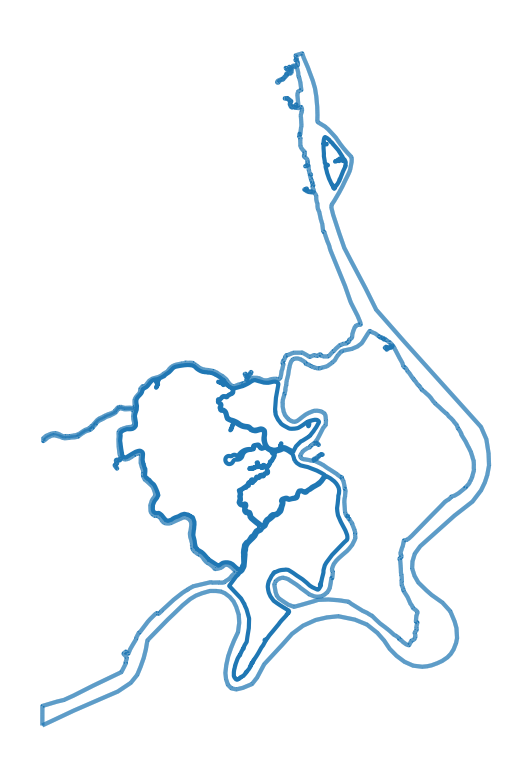

In [20]:
base = study_area.plot()
base.axis("off");
plt.show()

In [21]:
# # Tạo bảng pivot từ dataframe
# pivot_table = network_distance.pivot_table(values='Distance', index='StartPoint', columns='EndPoint')

# # Thay thế các giá trị NaN = 0
# cost_matrix = pivot_table.fillna(0).astype(int)
# # cost_matrix[cost_matrix == 0] = 1

# print(cost_matrix)

import pandas as pd

# Tạo bảng pivot từ dataframe
pivot_table = network_distance.pivot_table(values='Distance', index='EndPoint', columns='StartPoint', fill_value=0)

# Chuyển đổi thành ma trận numpy để sử dụng với spopt và pulp
cost_matrix = pivot_table.values.astype(int)

# print(cost_matrix)

# Tạo bảng pivot từ dataframe
# pivot_table = network_distance.pivot_table(values='Distance', index='EndPoint', columns='StartPoint')

# # Thay thế các giá trị NaN = 0
# cost_matrix = pivot_table.fillna(0).astype(int)

print(cost_matrix)

[[  9   0  10 ... 470 480 490]
 [ 20  10   0 ... 459 469 479]
 [ 30  20   9 ... 450 460 470]
 ...
 [490 480 469 ...   9   0   9]
 [500 490 479 ...  19   9   0]
 [509 500 489 ...  29  19   9]]


In [22]:
# # Nhập số lượng facilities cần tìm
# p_facilities = int(input("Nhập số lượng facilities cần tìm: "))

# # Số lượng điểm
# num_points = cost_matrix.shape[0]

# # Thiết lập bài toán quy hoạch nguyên
# model = pulp.LpProblem("p-Center Problem", pulp.LpMinimize)

# # Biến quyết định
# x = pulp.LpVariable.dicts("x", (range(num_points), range(num_points)), 0, 1, pulp.LpBinary)
# y = pulp.LpVariable.dicts("y", range(num_points), 0, 1, pulp.LpBinary)

# # Hàm mục tiêu: minimize max distance
# z = pulp.LpVariable("z", 0)
# model += z

# # Ràng buộc: mỗi điểm phải được phục vụ bởi đúng một facility
# for i in range(num_points):
#     model += pulp.lpSum(x[i][j] for j in range(num_points)) == 1

# # Ràng buộc: số lượng facilities được chọn bằng p_facilities
# model += pulp.lpSum(y[j] for j in range(num_points)) == p_facilities

# # Ràng buộc: x[i][j] <= y[j] và z >= d_ij * x[i][j]
# for i in range(num_points):
#     for j in range(num_points):
#         model += x[i][j] <= y[j]
#         model += z >= cost_matrix.iloc[i, j] * x[i][j]

# # Giải bài toán
# model.solve()

# # In kết quả
# print(f"Trạng thái giải: {pulp.LpStatus[model.status]}")
# print(f"Khoảng cách tối ưu: {pulp.value(z)}")
# print("Các điểm được chọn làm facility:")

# selected_facilities = []
# for j in range(num_points):
#     if pulp.value(y[j]) == 1:
#         facility_info = facility_points.iloc[j]
#         selected_facilities.append({
#             "Id": facility_info["Id"],
#             "FacilityPoints": facility_info["FacilityPoints"],
#             "XX": facility_info["XX"],
#             "YY": facility_info["YY"]
#         })

# # Tạo DataFrame từ danh sách các điểm facility được chọn
# selected_facilities_df = pd.DataFrame(selected_facilities)
# print(selected_facilities_df)

# # Phân công các điểm tới facilities
# print("Các điểm được phủ từ facilities:")
# for i in range(num_points):
#     for j in range(num_points):
#         if pulp.value(x[i][j]) == 1:
#             print(f"Facility {j} bao phủ điểm {i}")

In [23]:
# Nhập số lượng facilities cần tìm từ người dùng
p_facilities = int(input("Nhập số lượng facilities cần tìm: "))

# Khởi tạo và giải quyết bài toán LSCP
pcenter = PCenter.from_cost_matrix(cost_matrix, p_facilities)
pcenter = pcenter.solve(pulp.PULP_CBC_CMD(msg=False))

# Lấy giá trị objective
pcenter_objval = pcenter.problem.objective.value()

# Tạo danh sách các điểm được chọn trong pcenter_objval
selected_facilities = [i for i, dv in enumerate(pcenter.fac_vars) if dv.varValue]

# Tạo DataFrame từ danh sách các điểm được chọn
selected_facilities_df = facility_points.iloc[selected_facilities].reset_index(drop=True)

# In giá trị objective và DataFrame các điểm được chọn
print("Tổng số trạm được tìm thấy:", pcenter_objval)
print("Các điểm được chọn làm facility:")
print(selected_facilities_df)


Tổng số trạm được tìm thấy: 29.0
Các điểm được chọn làm facility:
   Id  FacilityPoints             XX            YY
0  53              53  612750.150250  1.189644e+06
1  58              58  612798.035139  1.189659e+06
2  60              60  612817.189095  1.189664e+06
3  66              66  612874.650961  1.189682e+06
4  72              72  612932.112828  1.189699e+06
5  77              77  612979.997717  1.189713e+06
6  83              83  613037.459583  1.189730e+06
7  89              89  613095.681688  1.189745e+06
8  95              95  613154.048325  1.189759e+06
9  98              98  613183.231643  1.189766e+06


In [24]:
import os
import random
from datetime import datetime

# Tạo tên file với giá trị lscp_objval, thời gian hiện tại, ngày tháng hiện tại và số ngẫu nhiên
current_time = datetime.now().strftime("%H%M%S_%d%m%Y")  # Giờ phút giây và ngày tháng năm hiện tại
random_number = random.randint(1000, 9999)  # Số ngẫu nhiên
file_name = f"ketqua_{p_facilities}pCenter_{current_time}_{random_number}.csv"

# Đường dẫn thư mục lưu trữ file
directory = "C:/Users/ASUS/Downloads/project/python-rescue-station/DB_Results/DB_Result_PCenter_Rescue_Station"

# Tạo thư mục nếu chưa tồn tại
os.makedirs(directory, exist_ok=True)

# Đường dẫn đầy đủ đến file CSV
file_path = os.path.join(directory, file_name)

# Xuất DataFrame thành file CSV
selected_facilities_df.to_csv(file_path, index=False)

print(f"File đã được lưu tại: {file_path}")

File đã được lưu tại: C:/Users/ASUS/Downloads/project/python-rescue-station/DB_Results/DB_Result_PCenter_Rescue_Station\ketqua_10pCenter_224328_11072024_6601.csv


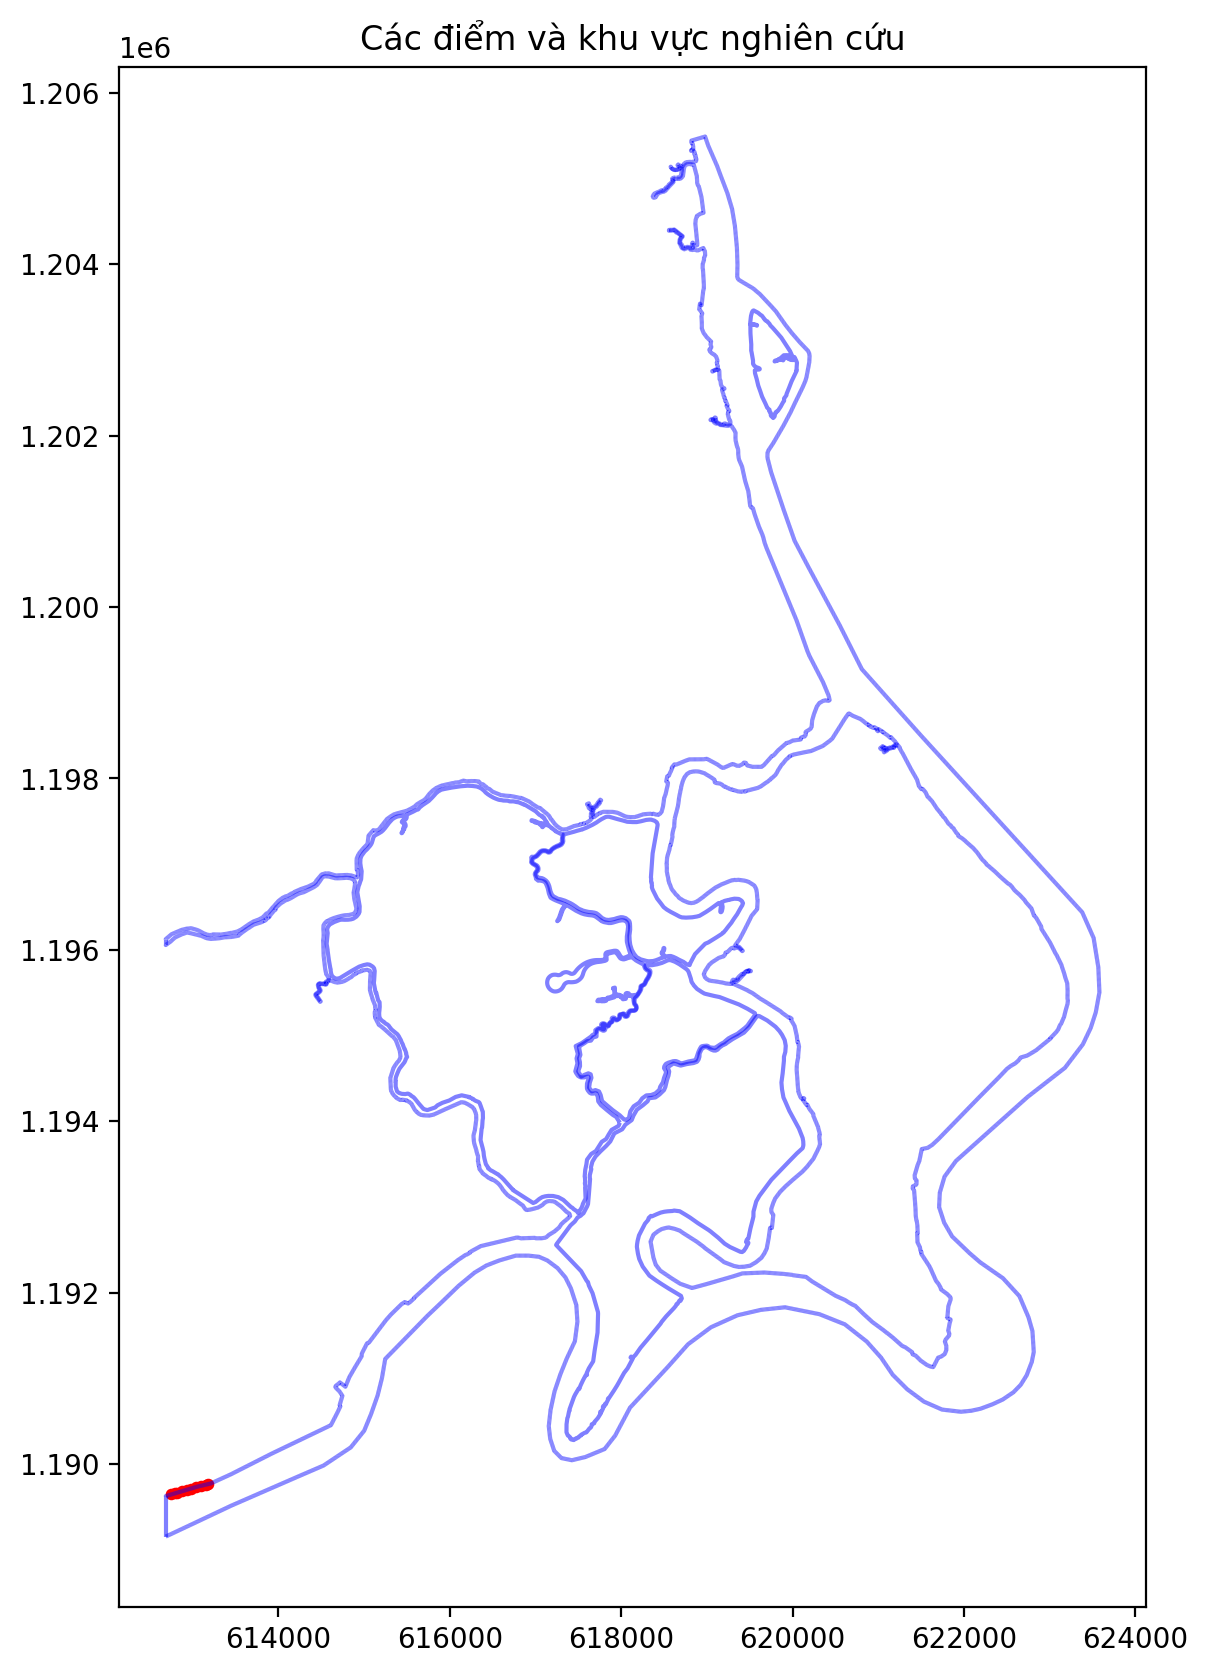

In [25]:
# Đọc shapefile của study_area
study_area = gpd.read_file('C:/Users/ASUS/Downloads/project rescue station of An/Graph/Thuyhe_HCM_motphan_DISSOLVE_Line5/Thuyhe_HCM_motphan_DISSOLVE_Line5.shp').dissolve()

# Đọc dataframe từ file CSV
df = pd.read_csv(file_path)

# Chuyển đổi dataframe thành GeoDataFrame với hệ toạ độ 4326 (WGS84)
gdf_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['XX'], df['YY']), crs='EPSG:32648'
)

# Vẽ shapefile
fig, ax = plt.subplots(figsize=(10, 10))
study_area.plot(ax=ax, alpha=0.5, edgecolor='blue')

# Vẽ điểm từ GeoDataFrame lên cùng plot
gdf_points.plot(ax=ax, color='red', markersize=10)

# Đặt tiêu đề và hiển thị plot
plt.title('Các điểm và khu vực nghiên cứu')
plt.show()

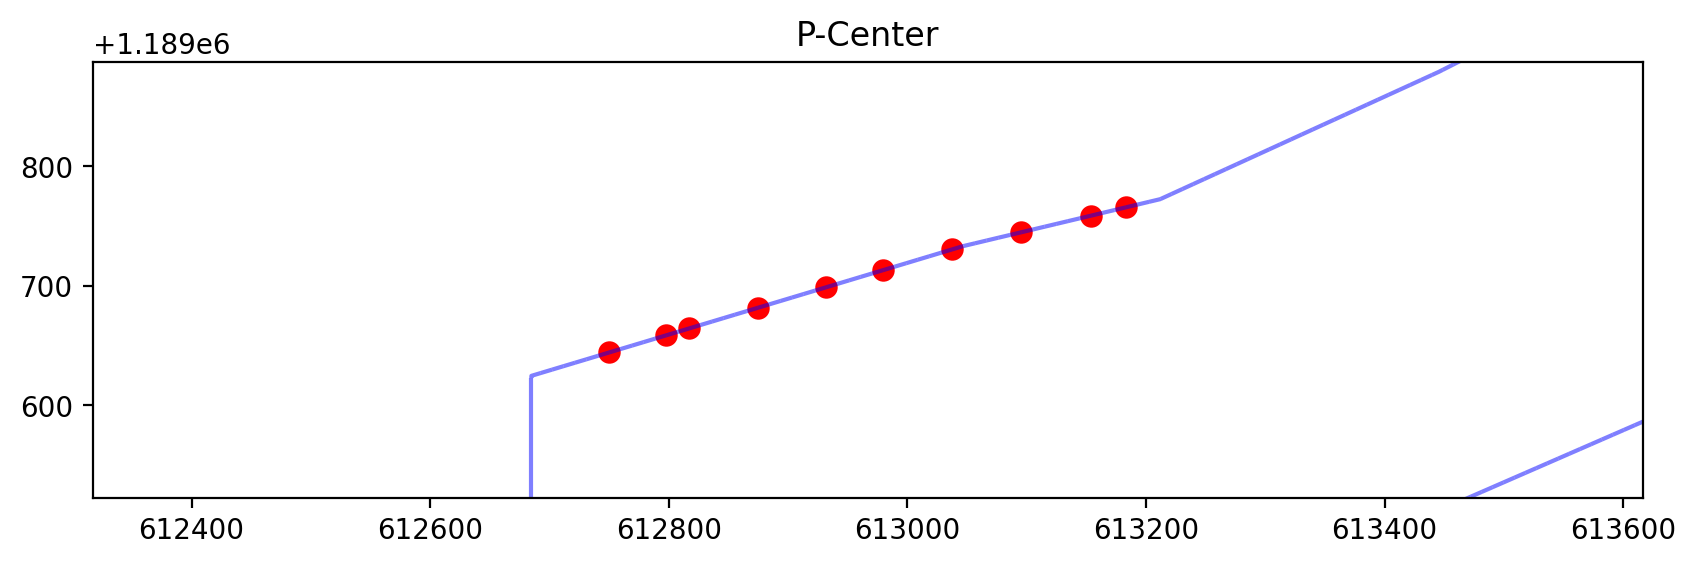

In [26]:
# Đọc dataframe từ file CSV
df = pd.read_csv(file_path)

# Chuyển đổi dataframe thành GeoDataFrame với hệ toạ độ 4326 (WGS84)
gdf_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['XX'], df['YY']), crs='EPSG:32648'
)

# Vẽ shapefile
fig, ax = plt.subplots(figsize=(10, 10))
study_area.plot(ax=ax, alpha=0.5, edgecolor='blue')

# Vẽ điểm từ GeoDataFrame lên cùng plot
gdf_points.plot(ax=ax, color='red', markersize=50)

# Lấy các giới hạn của khu vực đã vẽ
xmin, ymin, xmax, ymax = gdf_points.total_bounds

# Tính toán phần lớn hơn của giới hạn
padding = 1
xrange = xmax - xmin
yrange = ymax - ymin
xmin_new = xmin - padding * xrange
xmax_new = xmax + padding * xrange
ymin_new = ymin - padding * yrange
ymax_new = ymax + padding * yrange

# Đặt giới hạn của plot để phóng to các điểm vừa vẽ
ax.set_xlim(xmin_new, xmax_new)
ax.set_ylim(ymin_new, ymax_new)

# Đặt tiêu đề và hiển thị plot
plt.title('P-Center')
plt.show()